In [513]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Taken from: https://wendynavarrete.com/principal-component-analysis-with-numpy/

# Iris Datensatz laden

In [514]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  header=None)
iris.columns = ["sepal_length","sepal_width",'petal_length','petal_width','species']
iris.dropna(how='all', inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

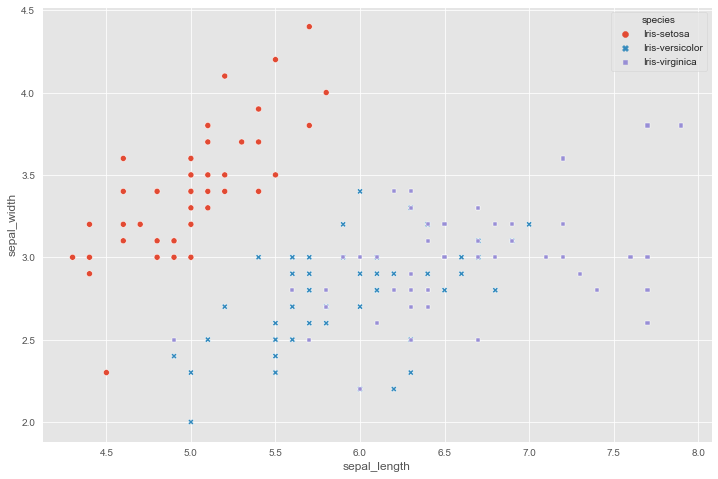

In [515]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
sns.scatterplot(x = iris.sepal_length, y=iris.sepal_width,
               hue = iris.species, style=iris.species)

# Daten zentrieren

In [516]:
# # Mittelwert berechnen
# x_mean = np.mean(x)
# y_mean = np.mean(y)
#
# # Standardabweichung berechnen
# x_std = np.std(x)
# y_std = np.std(y)
#
# # zentrieren
# x = [ (x - x_mean) / x_std for x in x]
# y = [ (y - y_mean) / y_std for y in y]
#
# figsize=(10, 10)
# plt.figure(figsize=figsize)
# plt.scatter(x=x, y=y)

def standardize_data(arr):

    '''
    This function standardize an array, its substracts mean value,
    and then divide the standard deviation.

    param 1: array
    return: standardized array
    '''
    rows, columns = arr.shape

    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)

    for column in range(columns):

        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)

        for element in X[:,column]:

            tempArray = np.append(tempArray, ((element - mean) / std))
            #tempArray = np.append(tempArray, ((element - mean) ))  #todo asdf

        standardizedArray[:,column] = tempArray

    return standardizedArray

# Standardizing data

X = iris.iloc[:, 0:4].values
y = iris.species.values

X = standardize_data(X)


# Kovarianz Matrix erstellen

In [517]:
covariance_matrix = np.cov(X.T)
#covariance_matrix = np.corrcoef(X.T)  # normalisierte covarianz

covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

# Eigenvektor und Eigenwerte der Kovarianzmatrix berechnen

In [518]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


In [519]:
eigen_values

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [520]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

# Features transformieren

In [521]:
projection_matrix = (eigen_vectors.T[:][:2]).T
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [522]:
X_trans = X.dot(projection_matrix)
X_trans[:10]

array([[-2.26454173, -0.5057039 ],
       [-2.0864255 ,  0.65540473],
       [-2.36795045,  0.31847731],
       [-2.30419716,  0.57536771],
       [-2.38877749, -0.6747674 ],
       [-2.07053681, -1.51854856],
       [-2.44571134, -0.07456268],
       [-2.23384186, -0.24761393],
       [-2.34195768,  1.09514636],
       [-2.18867576,  0.44862905]])

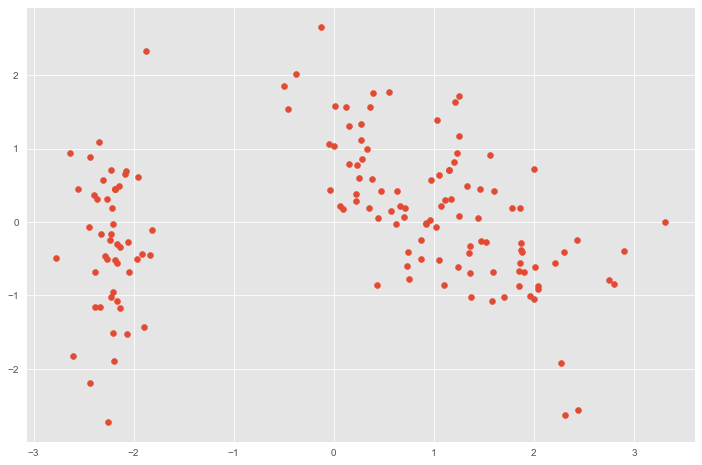

In [523]:
plt.scatter(x=X_trans[:,0], y=X_trans[:,1])

# pca vergleich

In [524]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(iris.iloc[:, 0:4].values)

pca_features[:10]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ]])

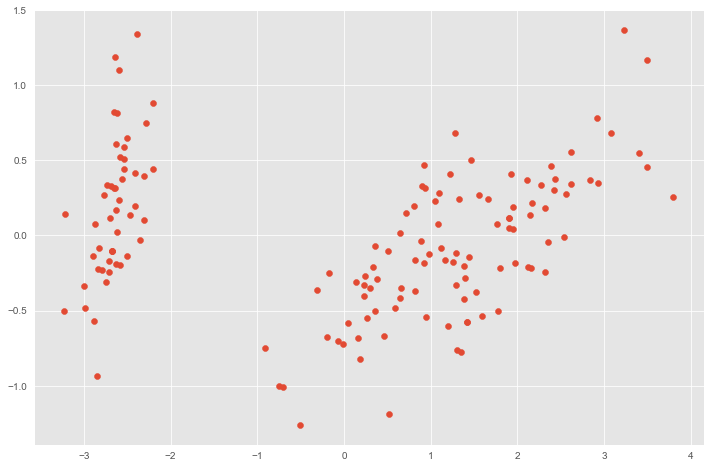

In [525]:
plt.scatter(x=pca_features[:,0], y=pca_features[:,1])